In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
xrange=range
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
table = pd.read_excel('MASTER FILE.xlsx')

table = table.round(2)

table.set_index("Date", inplace = True)
display(table.head())
display(table.tail())

,AUROPHARMA,GLAXO,GLENMARK,ZYDUSLIFE,WIPRO,TECHM,BSOFT,HCLTECH,SUPRAJIT,BOSCHLTD,JAMNAAUTO,MAHSCOOTER,TCI,SCI,AEGISCHEM,GPPL,NCC,KNRCON,LT,KALPATPOWR
Date,,,,,,,,,,,,,,,,,,,,
2012-10-01,72.18,1001.58,417.70,170.06,143.51,256.39,68.87,145.29,28.35,8838.30,11.80,360.00,42.74,59.3,15.94,51.90,48.55,11.36,714.09,85.30
2012-10-03,73.22,990.15,419.45,171.80,142.59,248.55,68.90,147.84,28.60,8810.80,11.86,356.65,45.25,59.7,15.46,51.85,49.60,11.58,715.14,87.20
2012-10-04,72.35,976.05,407.00,166.07,143.59,242.95,67.63,147.26,28.00,8909.00,11.80,368.25,44.37,59.2,16.24,53.00,51.70,11.79,726.25,88.90
2012-10-05,69.30,971.52,399.95,163.88,139.97,236.70,65.82,143.39,27.55,8734.75,11.72,361.00,44.03,57.8,17.24,52.00,51.75,11.64,733.29,88.60
2012-10-08,71.72,968.32,407.00,168.00,137.02,235.01,66.86,139.69,27.10,8625.05,11.50,361.00,43.59,57.3,18.18,51.55,53.00,11.48,709.23,89.65


,AUROPHARMA,GLAXO,GLENMARK,ZYDUSLIFE,WIPRO,TECHM,BSOFT,HCLTECH,SUPRAJIT,BOSCHLTD,JAMNAAUTO,MAHSCOOTER,TCI,SCI,AEGISCHEM,GPPL,NCC,KNRCON,LT,KALPATPOWR
Date,,,,,,,,,,,,,,,,,,,,
2022-10-24,524.50,1373.35,397.90,413.10,384.70,1048.15,282.15,1031.60,330.35,15623.15,111.65,5229.55,762.60,125.30,299.35,83.15,72.15,212.05,1909.75,463.65
2022-10-25,519.90,1363.65,401.60,417.40,384.65,1082.50,274.10,1026.50,321.70,15646.35,109.50,5243.85,744.20,122.80,299.40,83.20,73.45,218.90,1949.10,457.70
2022-10-27,529.55,1365.75,399.65,433.60,382.65,1075.85,270.20,1032.05,323.55,15743.15,110.50,5260.55,733.85,126.90,300.25,83.85,73.80,222.40,1964.05,461.90
2022-10-28,522.25,1374.85,399.70,430.00,383.25,1048.95,263.05,1030.00,320.30,16114.40,109.30,5220.85,749.75,127.65,317.50,84.75,74.05,220.75,1975.05,475.30
2022-10-31,538.15,1377.35,404.55,433.35,386.55,1063.40,270.85,1041.15,325.10,16488.60,112.60,5258.05,714.70,130.00,310.90,86.00,74.65,222.60,2023.10,475.35


Text(0, 0.5, 'price in $')

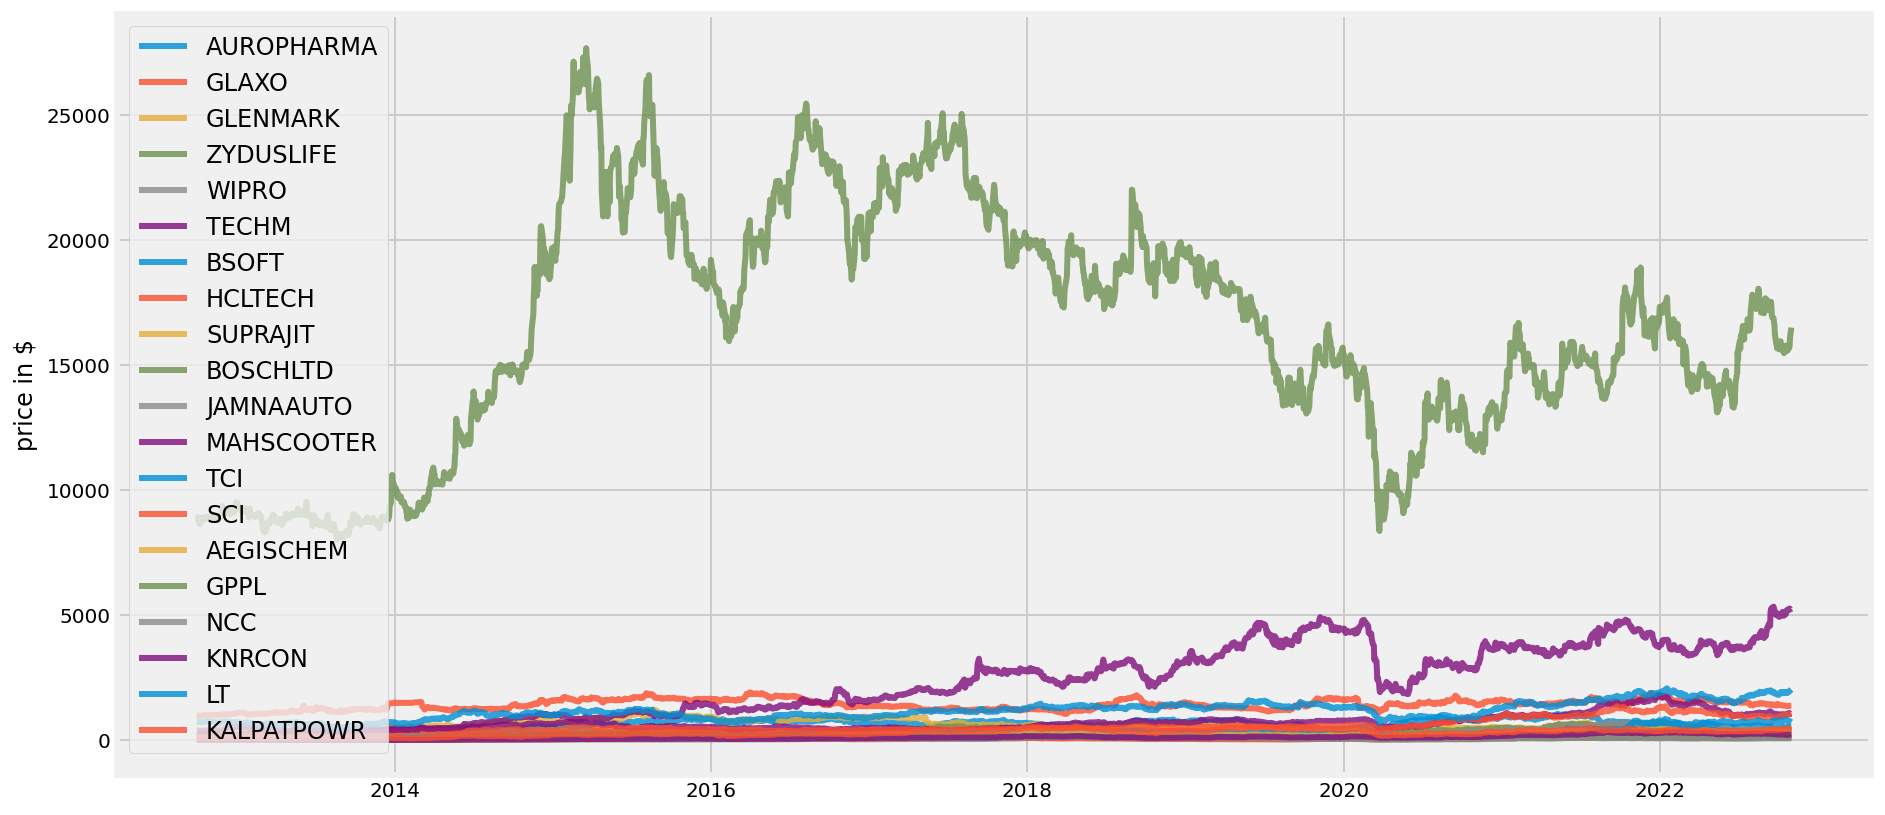

In [2]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in ₹')

Text(0, 0.5, 'Daily Returns')

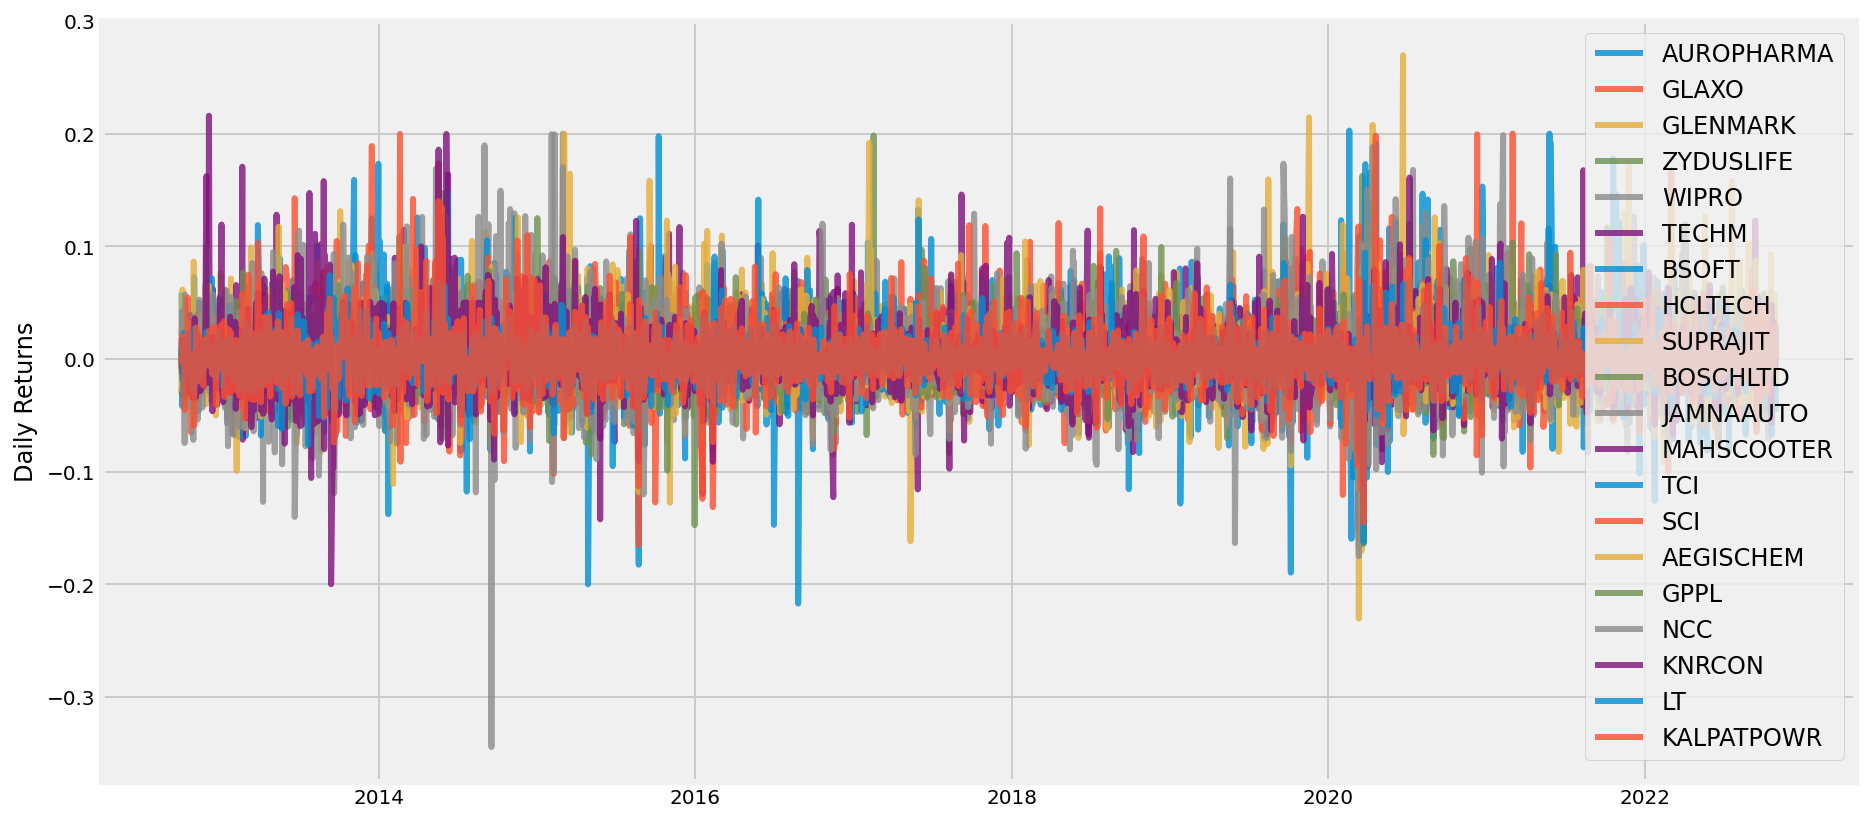

In [3]:
returns = table.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c]*100, lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Daily Returns (%)')
# returns.to_excel('returns.xlsx')

Text(0, 0.5, 'daily returns')

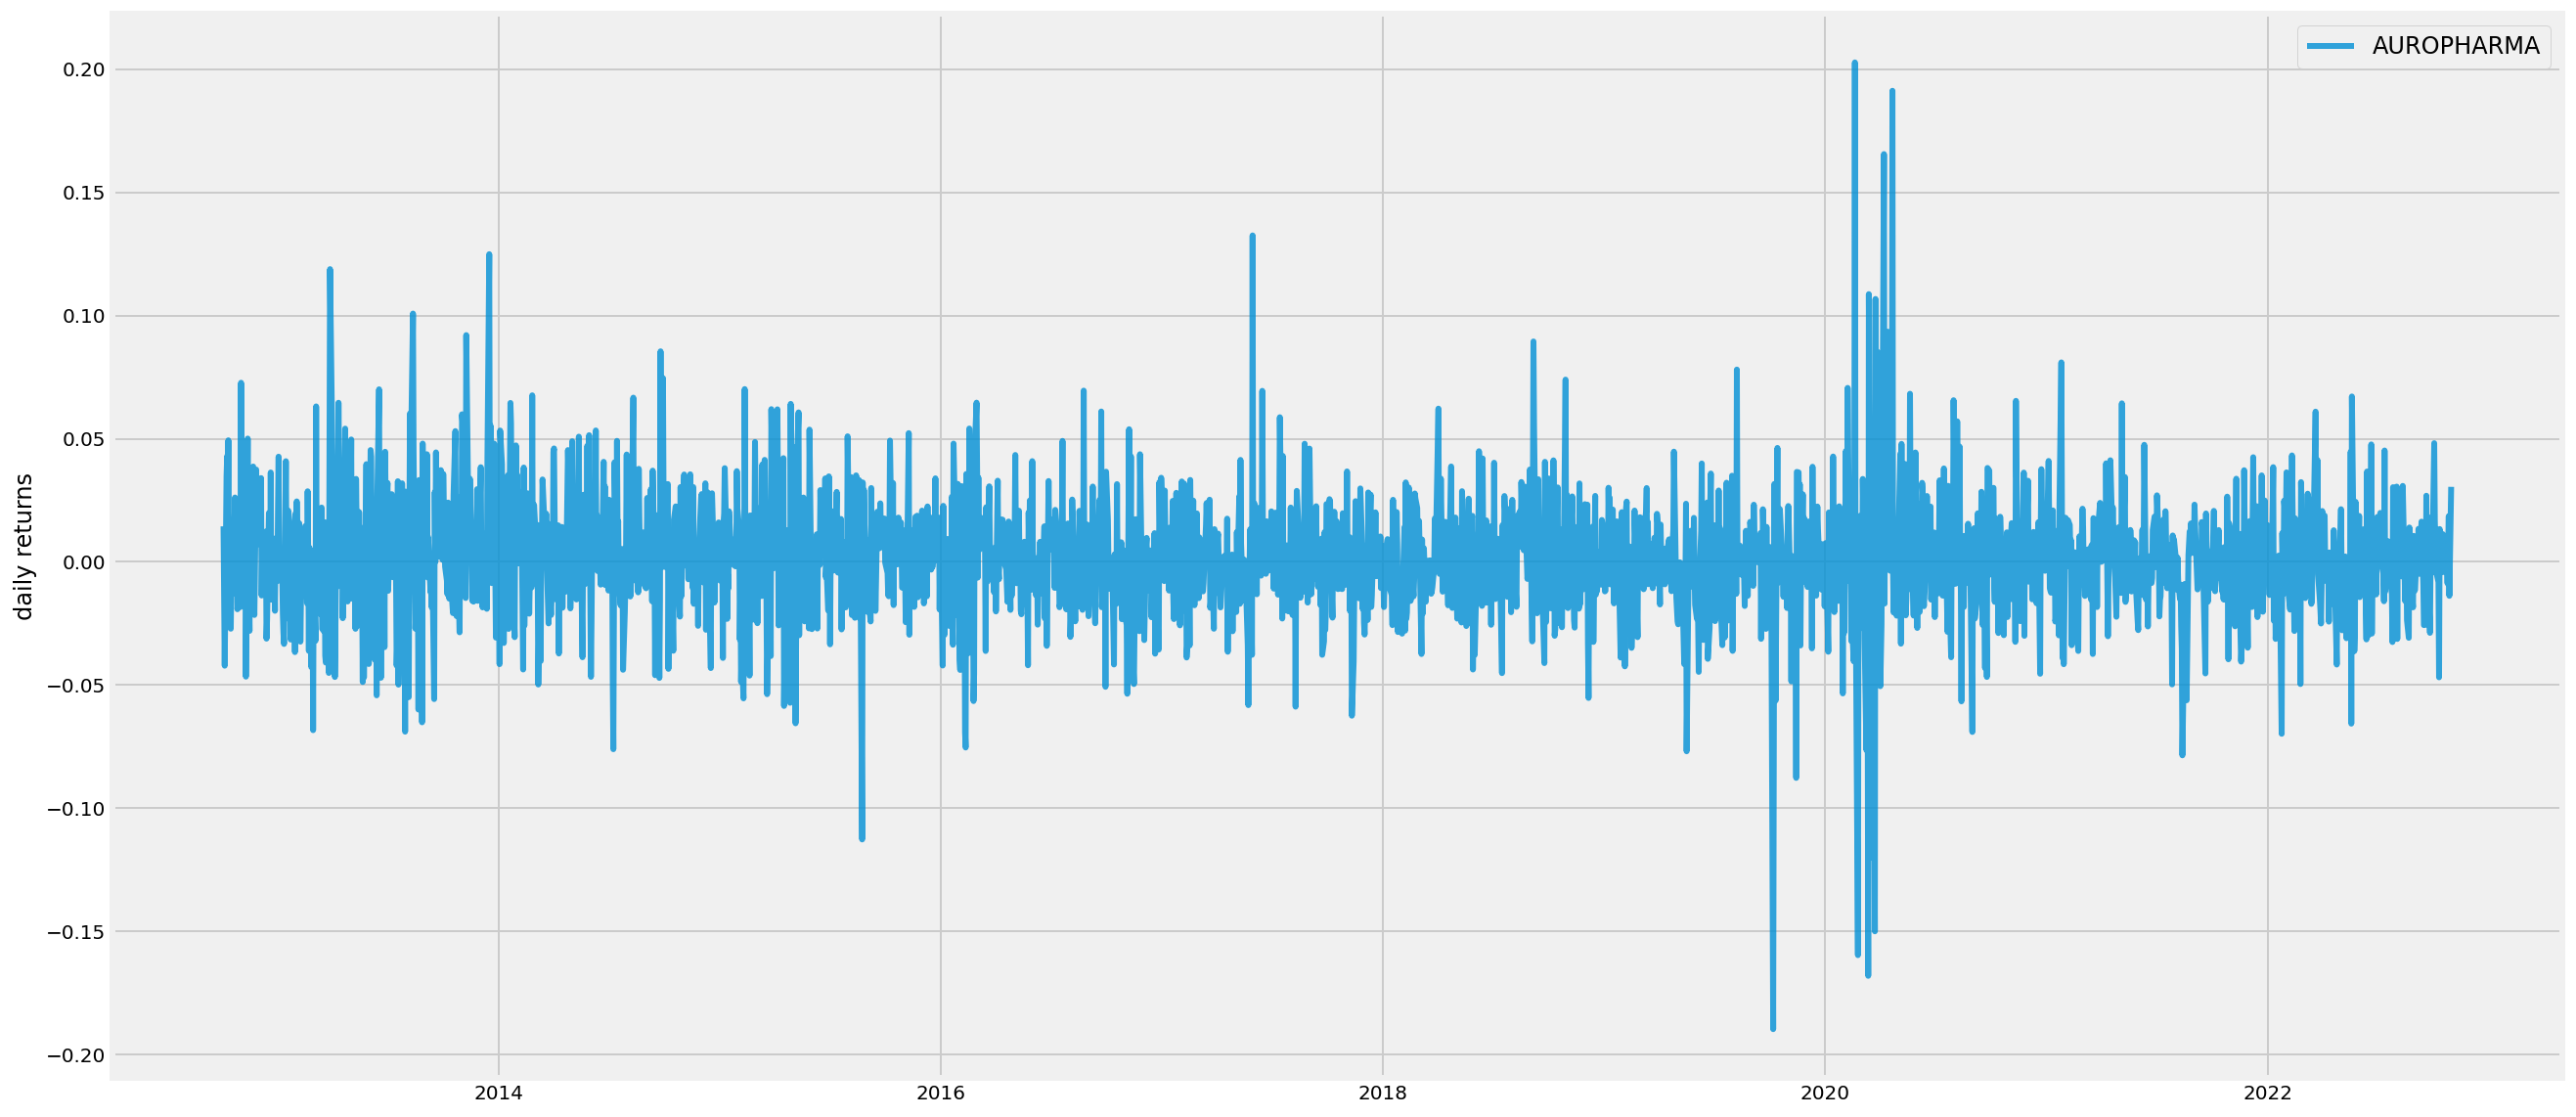

In [4]:
# Example of return of AUROBINDOPHARMA
plt.figure(figsize=(20, 10))
plt.plot(returns.index, returns['AUROPHARMA']*100, lw=3, alpha=0.8,label='AUROPHARMA')
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Daily returns (%)')

In [6]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):

    returns = np.sum(mean_returns* weights) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in xrange(num_portfolios):
        weights = np.random.random(20)
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [44]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 50000

# 10 yr GS as on 22 Nov 2022
risk_free_rate = 0.073201

In [45]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return: %", round(rp*100,2))
    print("Annualised Volatility: %", round(sdp*100,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return: %", round(rp_min,2)*100)
    print("Annualised Volatility: %", round(sdp_min,2)*100)
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: % 27.71
Annualised Volatility: % 19.13


            AUROPHARMA  GLAXO  GLENMARK  ZYDUSLIFE  WIPRO  TECHM  BSOFT  \
allocation        7.13   0.86      0.82       2.31  10.41   2.84   6.43   

            HCLTECH  SUPRAJIT  BOSCHLTD  JAMNAAUTO  MAHSCOOTER  TCI   SCI  \
allocation     7.93      4.69       0.4       4.86       11.19  2.8  0.09   

            AEGISCHEM  GPPL   NCC  KNRCON    LT  KALPATPOWR  
allocation      10.92  4.86  0.75   10.78  2.49        7.44  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: % 18.0
Annualised Volatility: % 16.0


            AUROPHARMA  GLAXO  GLENMARK  ZYDUSLIFE  WIPRO  TECHM  BSOFT  \
allocation         2.2  10.52      1.76      10.86   8.01   9.19   2.63   

            HCLTECH  SUPRAJIT  BOSCHLTD  JAMNAAUTO  MAH

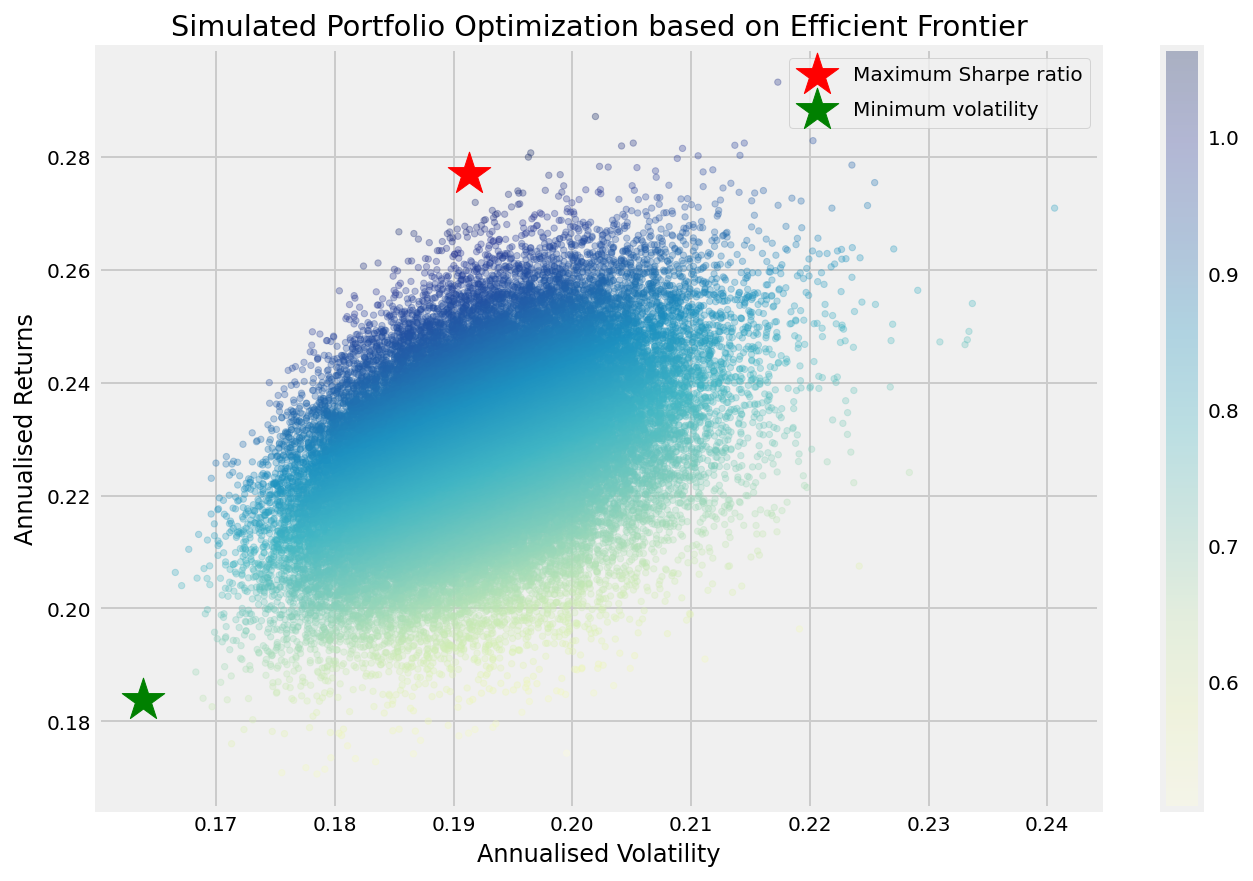

In [57]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)